In [152]:
import sarabande
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import astropy.io.fits as pyf
import os
import time
import pandas as pd
import sys

import matplotlib as mpl
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.style.use("light_mode") #custom matplotlib style sheet


In [18]:
full_4pcf_timing_df = pd.read_csv("data/full_param_scaling/4PCF_timing_data_params.csv")
full_3pcf_timing_df = pd.read_csv("data/full_param_scaling/3PCF_timing_data_params.csv")
proj_4pcf_timing_df = pd.read_csv("data/full_param_scaling/4PCF_projected_timing_data_params.csv")
proj_3pcf_timing_df = pd.read_csv("data/full_param_scaling/3PCF_projected_timing_data_params.csv")

In [86]:
proj_3pcf_timing_df

,Unnamed: 0,m_max,nbins,projected_create_bins,projected_create_kernels,calc_ft_data,projected_create_Cm_coeffs,calc_zeta
0,0,5,2,0.001928,0.024777,0.001066,0.016142,0.002744
1,1,5,3,0.000924,0.031825,0.001082,0.023983,0.007633
2,2,5,4,0.001016,0.040605,0.001026,0.032314,0.014868
3,3,5,5,0.001088,0.049332,0.001147,0.041024,0.024467
4,4,5,6,0.001131,0.057435,0.001155,0.049515,0.036453
5,5,5,7,0.001205,0.065689,0.001156,0.057995,0.050984
6,6,5,8,0.001286,0.074340,0.001153,0.065993,0.068263
7,7,6,2,0.000887,0.026267,0.001091,0.018794,0.003250
8,8,6,3,0.000937,0.039154,0.013654,0.030354,0.009366
9,9,6,4,0.001033,0.047043,0.001121,0.040567,0.017908


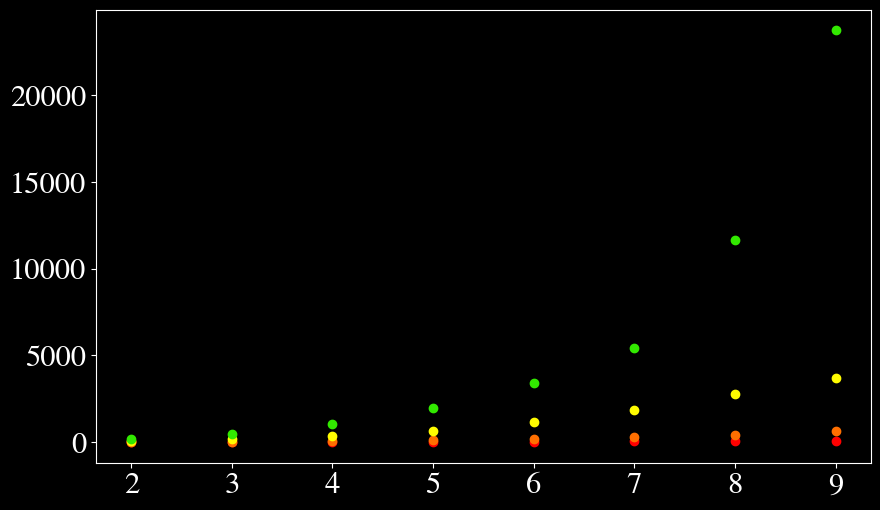

In [19]:
_4pcf_ell_0 = full_4pcf_timing_df[full_4pcf_timing_df['ell_max'] == 0]
_4pcf_ell_1 = full_4pcf_timing_df[full_4pcf_timing_df['ell_max'] == 1]
_4pcf_ell_2 = full_4pcf_timing_df[full_4pcf_timing_df['ell_max'] == 2]
_4pcf_ell_3 = full_4pcf_timing_df[full_4pcf_timing_df['ell_max'] == 3]

plt.scatter(_4pcf_ell_0['nbins'], _4pcf_ell_0['calc_zeta'])
plt.scatter(_4pcf_ell_1['nbins'], _4pcf_ell_1['calc_zeta'])
plt.scatter(_4pcf_ell_2['nbins'], _4pcf_ell_2['calc_zeta'])
plt.scatter(_4pcf_ell_3['nbins'], _4pcf_ell_3['calc_zeta'])
# plt.semilogy()

In [39]:
ells = [0,1,2,3]
bins = [2,3,4,5,6,7,8,9]

timing_4pcf_array = np.zeros((4, 8))
timing_3pcf_array = np.zeros((4, 8))

for i, ell in enumerate(ells):
    for j, bin_ in enumerate(bins):
        timing_4pcf_array[i, j] = float(full_4pcf_timing_df[full_4pcf_timing_df['ell_max'] == ell][full_4pcf_timing_df['nbins'] == bin_]['calc_zeta'])
        timing_3pcf_array[i, j] = float(full_3pcf_timing_df[full_3pcf_timing_df['ell_max'] == ell][full_3pcf_timing_df['nbins'] == bin_]['calc_zeta'])

/Users/jamessunseri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/jamessunseri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [101]:
ms = np.array([5,6,7,8,9,10,11,12])
bins = np.array([2,3,4,5,6,7,8])

timing_proj_4pcf_array = np.zeros((8, 7))
timing_proj_3pcf_array = np.zeros((8, 7))

for i, m in enumerate(ms):
    for j, bin_ in enumerate(bins):
        timing_proj_4pcf_array[i, j] = float(proj_4pcf_timing_df[proj_4pcf_timing_df['m_max'] == m][proj_4pcf_timing_df['nbins'] == bin_]['calc_zeta'])
        timing_proj_3pcf_array[i, j] = float(proj_3pcf_timing_df[proj_3pcf_timing_df['m_max'] == m][proj_3pcf_timing_df['nbins'] == bin_]['calc_zeta'])

/Users/jamessunseri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/jamessunseri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [95]:
timing_proj_3pcf_array

array([[0.00274362, 0.0076333 , 0.0148679 , 0.02446697, 0.0364525 ,
        0.05098396, 0.06826261],
       [0.00324997, 0.0093665 , 0.01790768, 0.0293705 , 0.04451066,
        0.0610139 , 0.08152501],
       [0.00378216, 0.01074505, 0.02104066, 0.03454113, 0.05135064,
        0.07170441, 0.09622364],
       [0.00423471, 0.01204196, 0.02379642, 0.03930518, 0.0585049 ,
        0.08176051, 0.10845673],
       [0.00487978, 0.01348934, 0.02667784, 0.04379834, 0.06708933,
        0.09250824, 0.12242888],
       [0.00528927, 0.0154464 , 0.02953368, 0.04955637, 0.07376816,
        0.10224665, 0.13645521],
       [0.00586938, 0.01666985, 0.03271846, 0.05345476, 0.08037073,
        0.11233905, 0.14985988],
       [0.006334  , 0.01799792, 0.03541801, 0.05881941, 0.08787552,
        0.12264458, 0.16227714]])

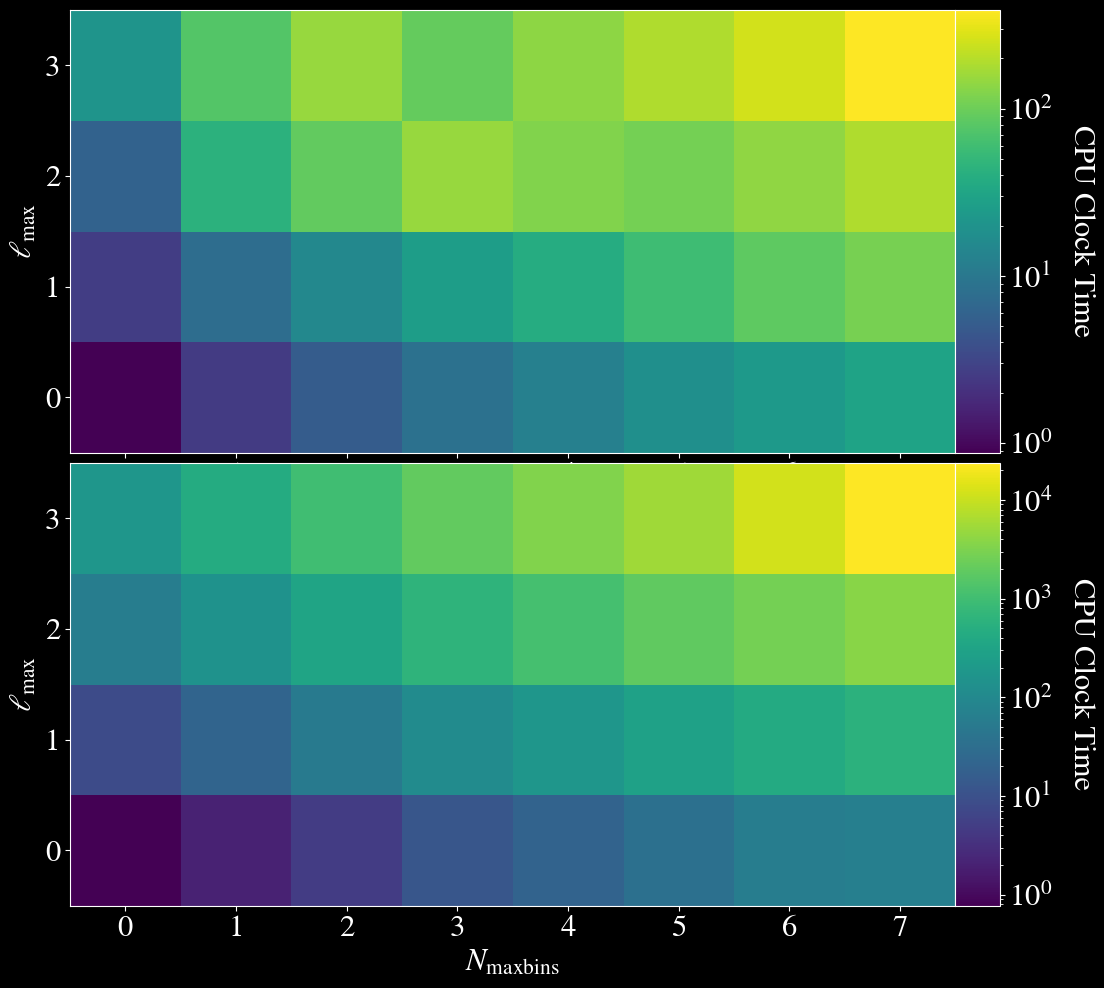

In [105]:
fig, axes = plt.subplots(2,1,sharey=True, figsize=(12,12))
im1 = axes[0].imshow(timing_3pcf_array,origin='lower',norm=mpl.colors.LogNorm(vmin=np.min(timing_3pcf_array), vmax=np.max(timing_3pcf_array)))
divider1 = axgrid.make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0)
cbar = plt.colorbar(im1, cax=cax1)
cbar.set_label("CPU Clock Time", rotation=270, labelpad=30)
axes[0].set_ylabel("$\\ell_{\mathrm{max}}$")

im2 = axes[1].imshow(timing_4pcf_array, origin='lower',norm=mpl.colors.LogNorm(vmin=np.min(timing_4pcf_array), vmax=np.max(timing_4pcf_array)))
divider2 = axgrid.make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0)
cbar = plt.colorbar(im2, cax=cax2)
cbar.set_label("CPU Clock Time", rotation=270, labelpad=30)
axes[1].set_xlabel("$N_{\mathrm{max bins}}$")
axes[1].set_ylabel("$\\ell_{\mathrm{max}}$")


plt.subplots_adjust(hspace=0)
plt.show()




/Users/jamessunseri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jamessunseri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


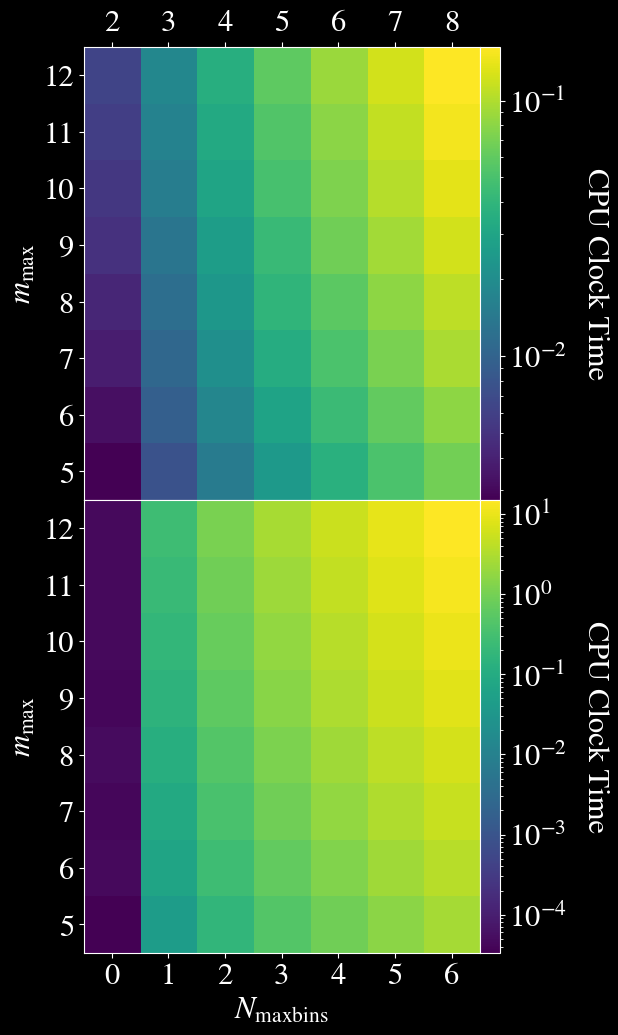

In [114]:

fig, axes = plt.subplots(2,1,sharey=True, figsize=(12,12))
im1 = axes[0].matshow(timing_proj_3pcf_array,origin='lower',norm=mpl.colors.LogNorm(vmin=np.min(timing_proj_3pcf_array), vmax=np.max(timing_proj_3pcf_array)))
divider1 = axgrid.make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0)
cbar = plt.colorbar(im1, cax=cax1)
cbar.set_label("CPU Clock Time", rotation=270, labelpad=30)
axes[0].set_ylabel("$m_{\mathrm{max}}$")

im2 = axes[1].matshow(timing_proj_4pcf_array, origin='lower',norm=mpl.colors.LogNorm(vmin=np.min(timing_proj_4pcf_array), vmax=np.max(timing_proj_4pcf_array)))
divider2 = axgrid.make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0)
cbar = plt.colorbar(im2, cax=cax2)
cbar.set_label("CPU Clock Time", rotation=270, labelpad=30)
axes[1].set_xlabel("$N_{\mathrm{max bins}}$")
axes[1].set_ylabel("$m_{\mathrm{max}}$")
axes

ms = np.array([4,5,6,7,8,9,10,11,12])
m_bins = np.array([1,2,3,4,5,6,7,8])

axes[0].set_xticklabels(m_bins)
axes[0].set_yticklabels(ms)

axes[1].xaxis.set_ticks_position('bottom')
plt.subplots_adjust(hspace=0)
plt.show()

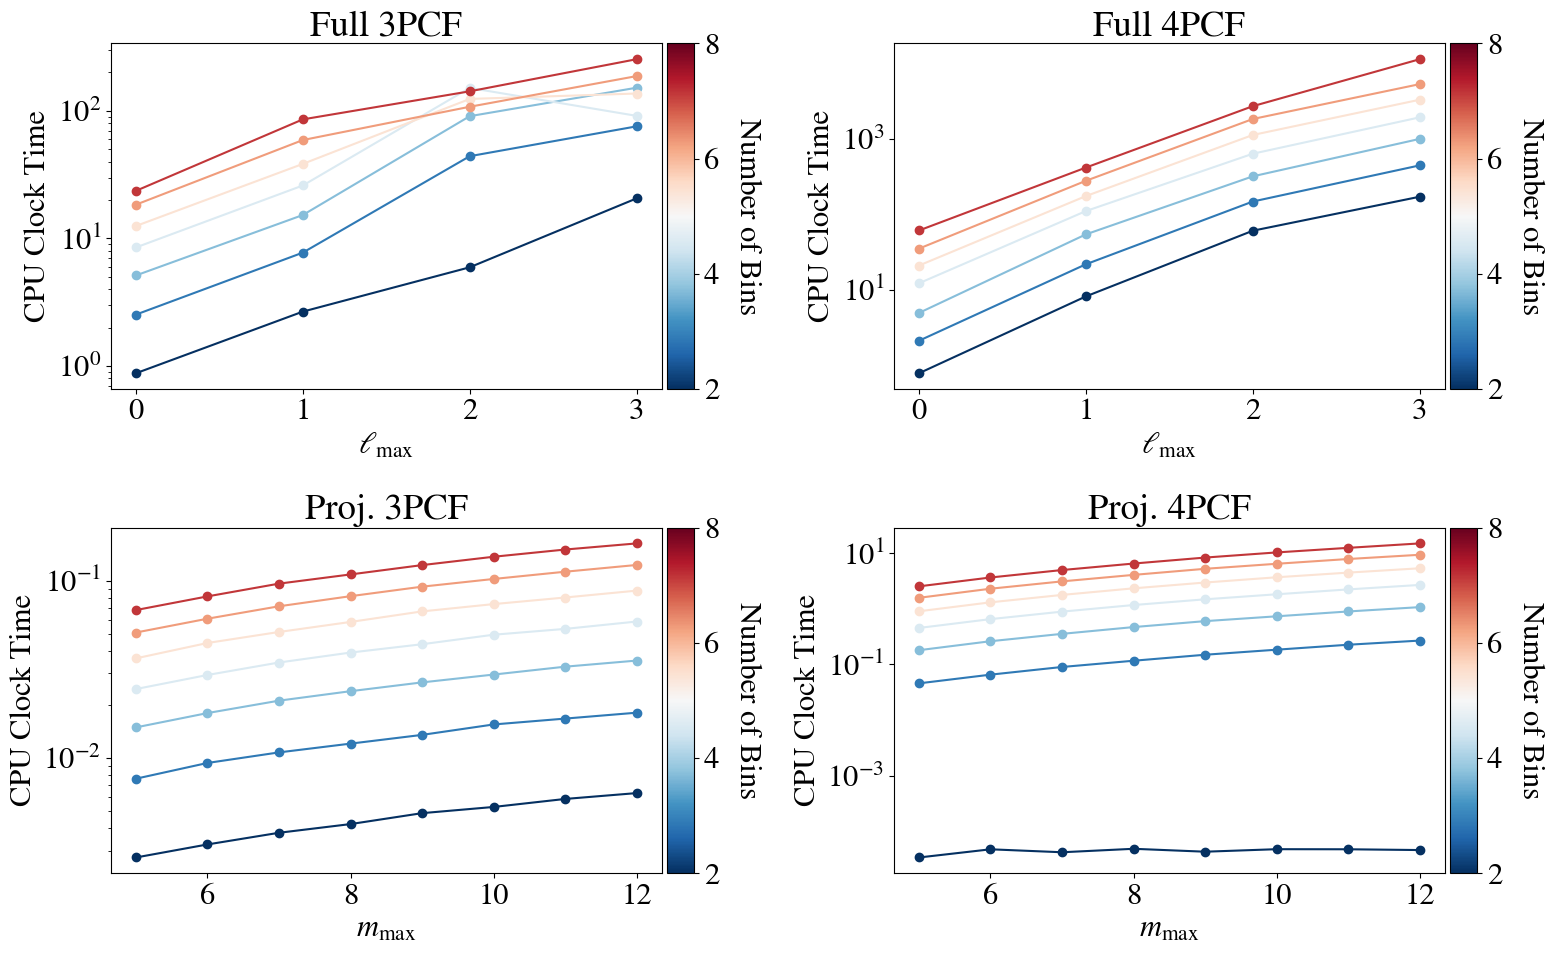

In [235]:
data = [timing_3pcf_array, timing_4pcf_array, timing_proj_3pcf_array, timing_proj_4pcf_array]
ms = np.array([5,6,7,8,9,10,11,12])
bins = np.array([2,3,4,5,6,7,8])

cmap = plt.cm.RdBu_r #choose cmap
n = 8 #number of colormap sample points to choose from
colors = cmap(np.linspace(0,1,n)) # sampling n different colors from the colormap

fig, axes = plt.subplots(2,2, figsize=(16,10))

for i in range(len(bins)):
    axes[0,0].plot(ells, data[0][:,i], color=colors[i], marker="o")
    axes[0,1].plot(ells, data[1][:,i], color=colors[i], marker="o")
    

for i in range(len(bins)):
    axes[1,0].plot(ms, data[2][:,i], color=colors[i], marker="o")
    axes[1,1].plot(ms, data[3][:,i], color=colors[i], marker="o")

#--------------------------------------------
axes[0,0].set_title("Full 3PCF")
axes[0,0].set_xticks(ells)
axes[0,0].set_ylabel("CPU Clock Time")
axes[0,0].semilogy()

norm_scaling = mpl.colors.Normalize(vmin=2, vmax=8) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(axes[0,0])
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("Number of Bins",rotation=270,labelpad=30) #give cbar a label and rotate it 

axes[0,0].set_xlabel("$\\ell_{\mathrm{max}}$")

#--------------------------------------------
axes[0,1].set_title("Full 4PCF")
axes[0,1].set_xticks(ells)
axes[0,1].set_ylabel("CPU Clock Time")
axes[0,1].semilogy()


norm_scaling = mpl.colors.Normalize(vmin=2, vmax=8) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(axes[0,1])
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("Number of Bins",rotation=270,labelpad=30) #give cbar a label and rotate it 

axes[0,1].set_xlabel("$\\ell_{\mathrm{max}}$")


#--------------------------------------------
axes[1,0].set_title("Proj. 3PCF")
axes[1,0].set_ylabel("CPU Clock Time")
axes[1,0].semilogy()

norm_scaling = mpl.colors.Normalize(vmin=2, vmax=8) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(axes[1,0])
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("Number of Bins",rotation=270,labelpad=30) #give cbar a label and rotate it 

axes[1,0].set_xlabel("$m_{\mathrm{max}}$")

#--------------------------------------------
axes[1,1].set_title("Proj. 4PCF")
axes[1,1].set_ylabel("CPU Clock Time")
axes[1,1].semilogy()

norm_scaling = mpl.colors.Normalize(vmin=2, vmax=8) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(axes[1,1])
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("Number of Bins",rotation=270,labelpad=30) #give cbar a label and rotate it 
axes[1,1].set_xlabel("$m_{\mathrm{max}}$")



fig.tight_layout()
plt.savefig("scaling_orders.pdf", dpi=300)
plt.show()

In [213]:
data[0].shape

(4, 8)

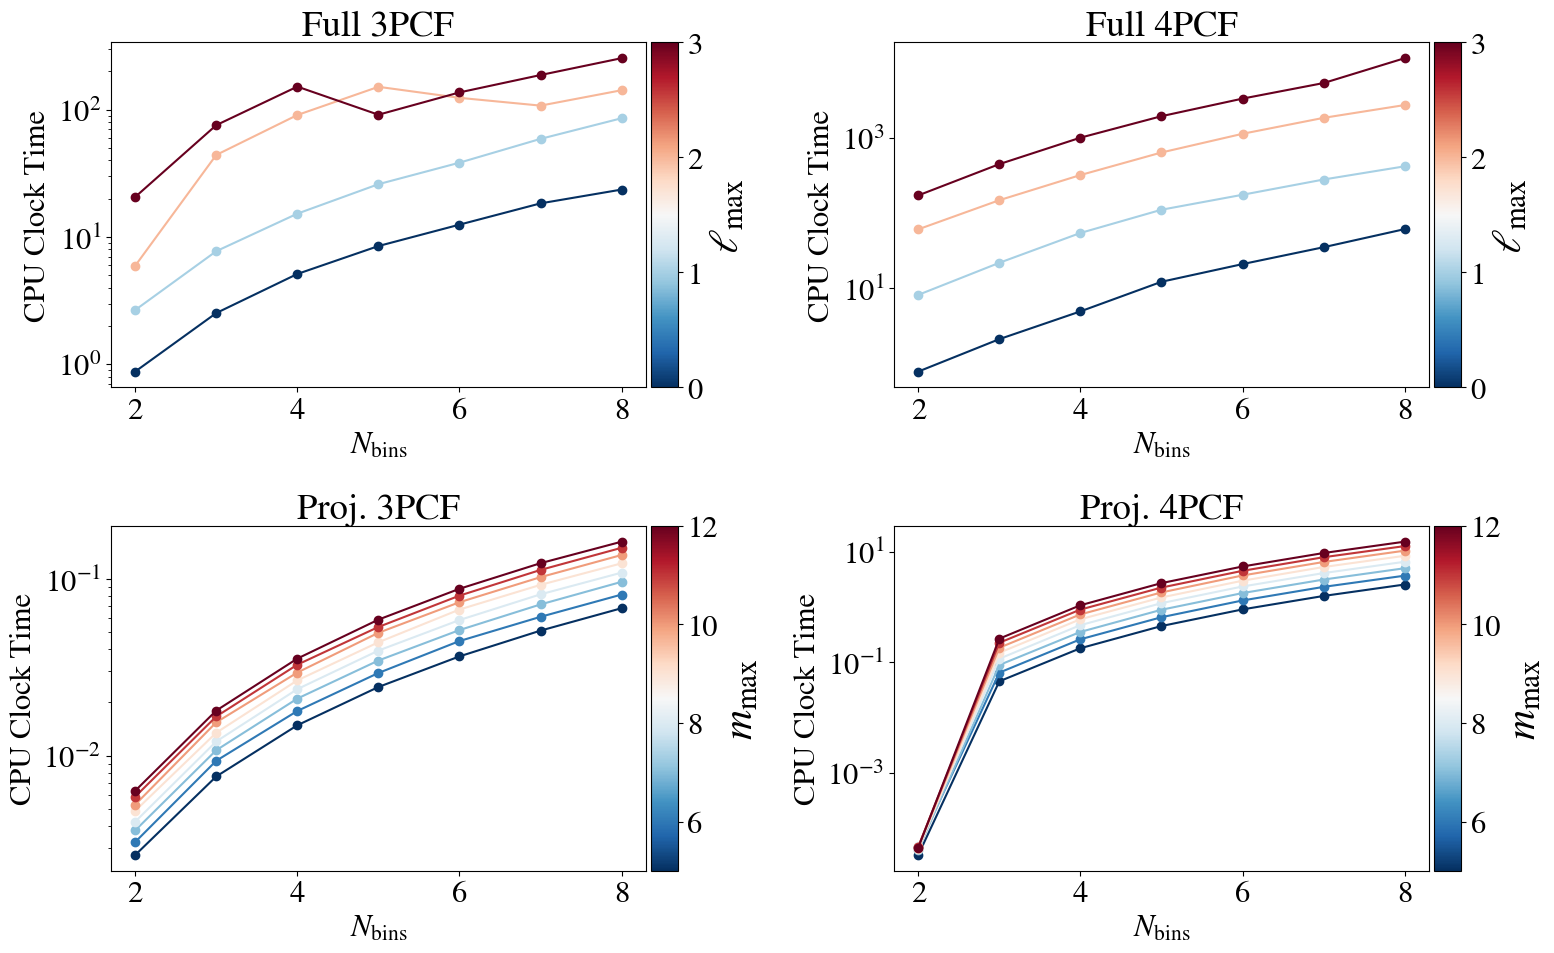

In [234]:
data = [timing_3pcf_array, timing_4pcf_array, timing_proj_3pcf_array, timing_proj_4pcf_array]
ms = np.array([5,6,7,8,9,10,11,12])
bins = np.array([2,3,4,5,6,7,8,9])
m_bins = np.array([2,3,4,5,6,7,8])

cmap = plt.cm.RdBu_r #choose cmap
n = 4 #number of colormap sample points to choose from
colors = cmap(np.linspace(0,1,n)) # sampling n different colors from the colormap

fig, axes = plt.subplots(2,2, figsize=(16,10))

for i in range(len(ells)):
    axes[0,0].plot(bins[:7], data[0][i,:7], color=colors[i], marker="o")
    axes[0,1].plot(bins[:7], data[1][i,:7], color=colors[i], marker="o")
    
cmap = plt.cm.RdBu_r #choose cmap
n = 8 #number of colormap sample points to choose from
colors = cmap(np.linspace(0,1,n)) # sampling n different colors from the colormap
    

for i in range(len(ms)):
    axes[1,0].plot(m_bins, data[2][i,:], color=colors[i], marker="o")
    axes[1,1].plot(m_bins, data[3][i,:], color=colors[i], marker="o")

#--------------------------------------------
axes[0,0].set_title("Full 3PCF")
# axes[0,0].set_xticks(ells)
axes[0,0].set_ylabel("CPU Clock Time")
axes[0,0].semilogy()

norm_scaling = mpl.colors.Normalize(vmin=0, vmax=3) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(axes[0,0])
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("$\\ell_{\mathrm{max}}$",fontsize=30) #give cbar a label and rotate it 

axes[0,0].set_xlabel("$N_{\mathrm{bins}}$")

#--------------------------------------------
axes[0,1].set_title("Full 4PCF")
# axes[0,1].set_xticks(ells)
axes[0,1].set_ylabel("CPU Clock Time")
axes[0,1].semilogy()


norm_scaling = mpl.colors.Normalize(vmin=0, vmax=3) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(axes[0,1])
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("$\\ell_{\mathrm{max}}$",fontsize=30) #give cbar a label and rotate it 

axes[0,1].set_xlabel("$N_{\mathrm{bins}}$")


#--------------------------------------------
axes[1,0].set_title("Proj. 3PCF")
axes[1,0].set_ylabel("CPU Clock Time")
axes[1,0].semilogy()

norm_scaling = mpl.colors.Normalize(vmin=5, vmax=12) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(axes[1,0])
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("$m_{\mathrm{max}}$",fontsize=30) #give cbar a label and rotate it 

axes[1,0].set_xlabel("$N_{\mathrm{bins}}$")

#--------------------------------------------
axes[1,1].set_title("Proj. 4PCF")
axes[1,1].set_ylabel("CPU Clock Time")
axes[1,1].semilogy()

norm_scaling = mpl.colors.Normalize(vmin=5, vmax=12) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(axes[1,1])
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("$m_{\mathrm{max}}$",fontsize=30) #give cbar a label and rotate it 
axes[1,1].set_xlabel("$N_{\mathrm{bins}}$")

# for i in range(2):
#     for j in range(2):
#         axes[i,j].set_xlim(2,8)


fig.tight_layout()
plt.savefig("scaling_Nbins.pdf", dpi=300)
plt.show()